In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from patsy import dmatrices

# 1. Data ingest #

In [16]:
df = pd.read_csv("Credit.csv")
df = df.drop(columns=['Unnamed: 0'])
print(df.head())
df.dtypes

    Income  Limit  Rating  Cards  Age  Education  Gender Student Married   
0   14.891   3606     283      2   34         11    Male      No     Yes  \
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   
3  148.924   9504     681      3   36         11  Female      No      No   
4   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  
0  Caucasian      333  
1      Asian      903  
2      Asian      580  
3      Asian      964  
4  Caucasian      331  


Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

In [10]:
# Add indicator variable if income > 50
df['Rich'] = 0
df.loc[df['Income'] > 50, 'Rich'] = 1
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Rich
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,1


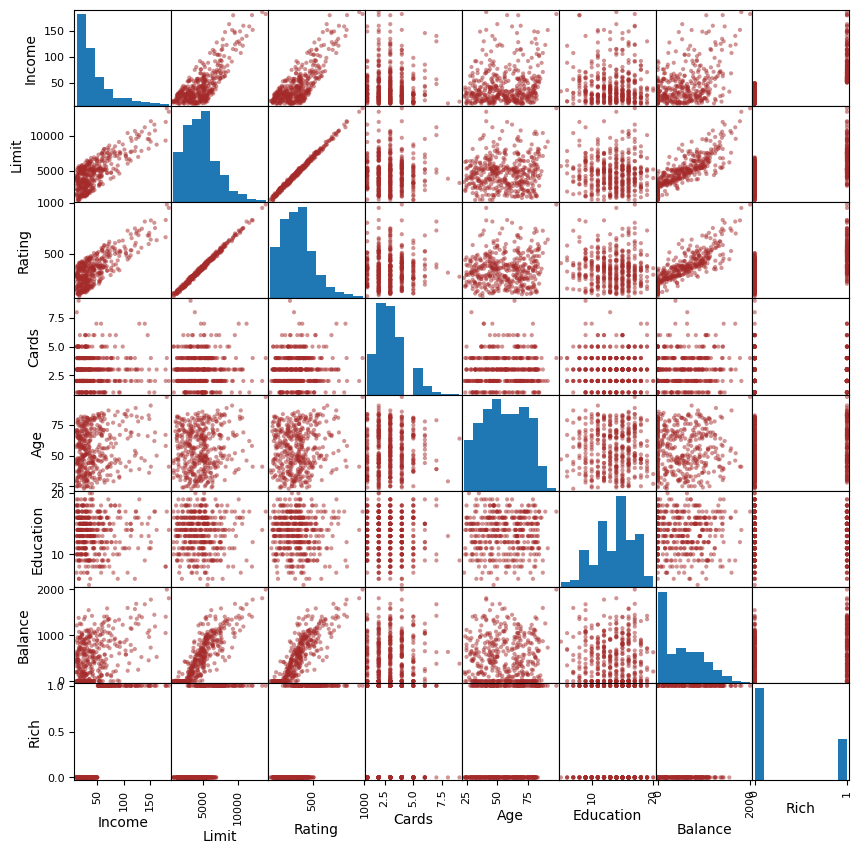

In [11]:
# scatter_plot 
_ = pd.plotting.scatter_matrix(df, color="brown",figsize=(10,10),)

In [12]:
def myLogiReg(model_formula, df):
    """
    Function returns the summary for fitted logiostic model.
    
    Parameter "model_formula" should be a patsy formula describing the model.
    Parameter "df" is a dataframe.
    """
    
    # Split the data into training (80%) and validation set (20%)
    mask = np.random.rand(len(df)) < 0.8
    train = df[mask]
    valid = df[~mask]

    # Prepare the data (dmatrices is from patsy library)
    y_train, X_train = dmatrices(model_formula, data=train, return_type='dataframe')
    y_train = np.array(y_train).reshape(len(y_train,))
    y_valid, X_valid = dmatrices(model_formula, data=valid, return_type='dataframe')

    # Train the model
    model = LogisticRegression(fit_intercept = False, C = 1e9, max_iter=1000000, solver='lbfgs')
    y_train = np.array(y_train).reshape(len(y_train,))
    result = model.fit(X_train, y_train)
    
    training_accuracy = accuracy_score(y_train, model.predict(X_train))
    training_log_loss = log_loss(y_train, model.predict_proba(X_train))
    validation_accuracy = accuracy_score(y_valid, model.predict(X_valid))

    # Retrun fitted model summary
    return (result, training_accuracy, training_log_loss, validation_accuracy)

def makeGraph(model_func, models, df):
    results = [model_func(model, df) for model in models]
    training_accuracy = np.array([result[1] for result in results])
    training_log_loss = np.array([result[2] for result in results])
    validation_accuracy = np.array([result[3] for result in results])

    x = np.arange(len(models))
    plt.figure(figsize=(12,5))
    plt.bar(x, training_accuracy, width=0.25, label='training_accuracy')
    plt.bar(x + 0.25, training_log_loss, width=0.25, label='training_log_loss')
    plt.bar(x + 0.5, validation_accuracy, width=0.25, label='validation_accuracy')
    plt.xticks(ticks=x+0.25, rotation=45, ha='right', labels=models)
    plt.legend()
    plt.show()

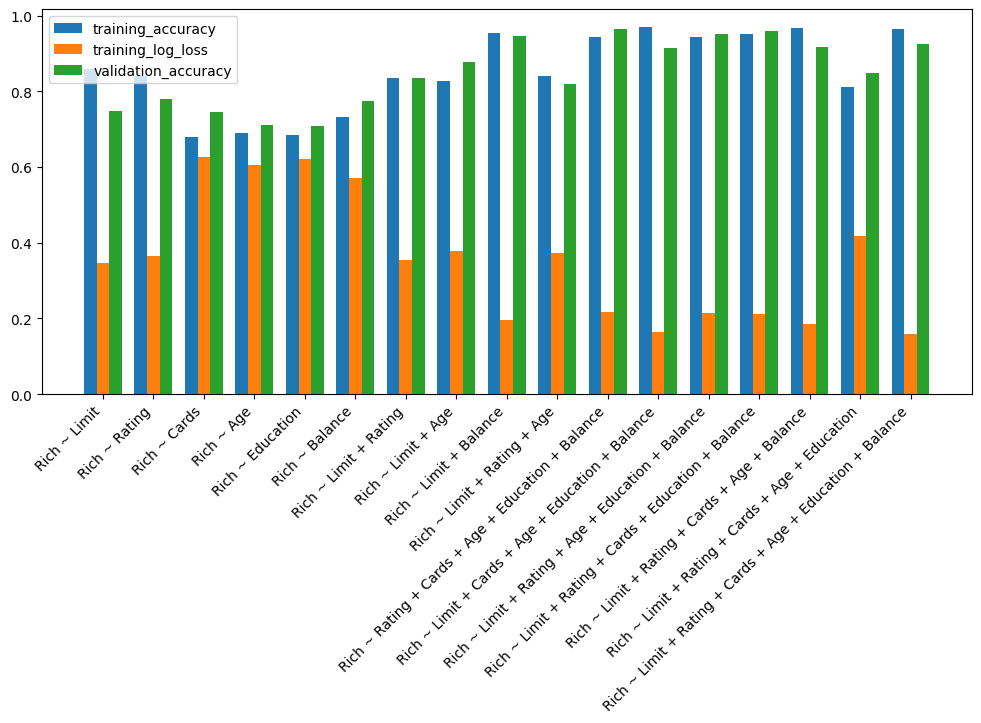

In [13]:
models = [
    'Rich ~ Limit',
    'Rich ~ Rating',
    'Rich ~ Cards',
    'Rich ~ Age',
    'Rich ~ Education',
    'Rich ~ Balance',
    'Rich ~ Limit + Rating',
    'Rich ~ Limit + Age',
    'Rich ~ Limit + Balance',
    'Rich ~ Limit + Rating + Age',
    'Rich ~ Rating + Cards + Age + Education + Balance',
    'Rich ~ Limit + Cards + Age + Education + Balance',
    'Rich ~ Limit + Rating + Age + Education + Balance',
    'Rich ~ Limit + Rating + Cards + Education + Balance',
    'Rich ~ Limit + Rating + Cards + Age + Balance',
    'Rich ~ Limit + Rating + Cards + Age + Education',
    'Rich ~ Limit + Rating + Cards + Age + Education + Balance',
]

makeGraph(myLogiReg, models, df)

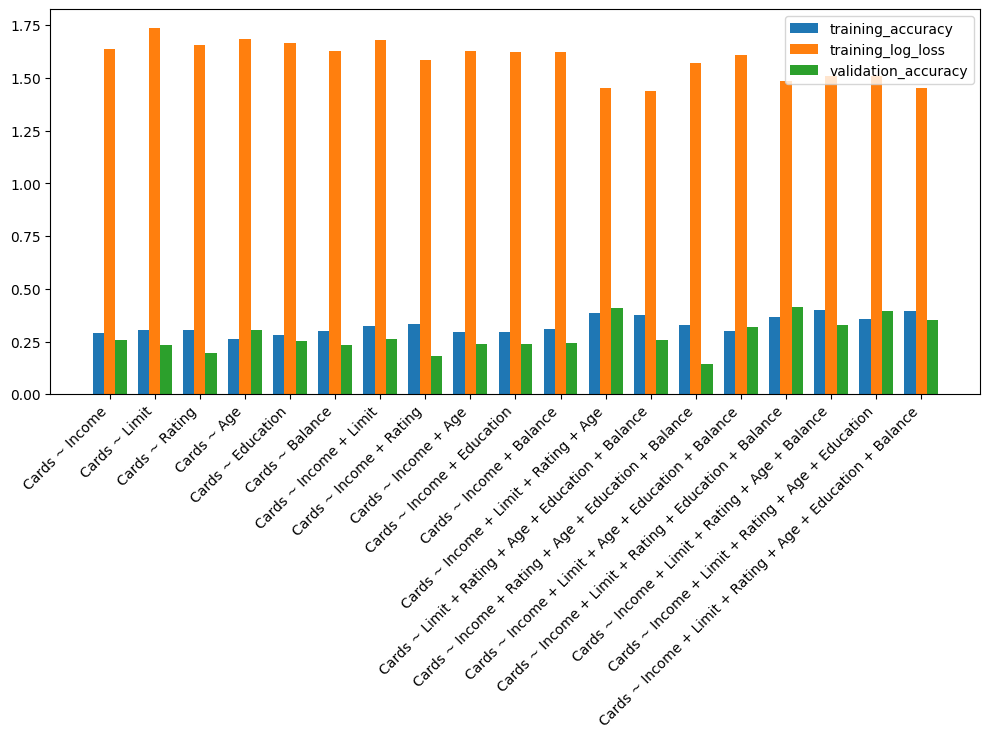

In [15]:
models = [
    'Cards ~ Income',
    'Cards ~ Limit',
    'Cards ~ Rating',
    'Cards ~ Age',
    'Cards ~ Education',
    'Cards ~ Balance',
    'Cards ~ Income + Limit',
    'Cards ~ Income + Rating',
    'Cards ~ Income + Age',
    'Cards ~ Income + Education',
    'Cards ~ Income + Balance',
    'Cards ~ Income + Limit + Rating + Age',
    'Cards ~ Limit + Rating + Age + Education + Balance',
    'Cards ~ Income + Rating + Age + Education + Balance',
    'Cards ~ Income + Limit + Age + Education + Balance',
    'Cards ~ Income + Limit + Rating + Education + Balance',
    'Cards ~ Income + Limit + Rating + Age + Balance',
    'Cards ~ Income + Limit + Rating + Age + Education',
    'Cards ~ Income + Limit + Rating + Age + Education + Balance',
]

makeGraph(myLogiReg, models, df)